## DDA3020 Autumn 2023 Homework 1 

### Programming Part 1：Polynomial Regression

--------------------------------------------------------------------------------------------------------------------------

In this exercise, we will try to fit a non-linear function $g$ with polynomial regression on the feasible space $\mathbf{X} = [0,11]$: 
$$\text{Unknown} \quad g(x) = ?$$ 
$$\text{Construct} \quad f(x) = \sum_{i=0}^n \alpha_i x^i \quad \Longleftrightarrow \quad f(x) = w^Tx',\quad x' = \begin{bmatrix} 1\\x\\x^2\\\vdots\\x^n\end{bmatrix},\quad s.t. \quad \forall x\in \mathbf{X}, \quad f(x) \approx g(x) $$ 
Where $n$ is the polynomial degree of freedom and is manually chosen.

--------------------------------------------------------------------------------------------------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt


We will use 17 noised samples to try to construct $f$.

In [2]:
x = np.array([ 0.    ,  0.6875,  1.375 ,  2.0625,  2.75  ,  3.4375,  4.125 , 4.8125,  5.5   ,  6.1875,  6.875 ,  7.5625,  8.25  ,  8.9375, 9.625 , 10.3125, 11.    ])
y = np.array([ -4.4282,   5.3943,   1.2416,  -5.9952,   3.1727,  18.6035, -3.2577,  -4.3593, -14.3989, -41.4483, -41.7916, -16.6214, 33.3262,  66.5037,  87.59  ,  64.3216,  10.4986])

#### 1. (1 point) 

(1) Define the function to calculate $\hat{w}$ directly from $X$, $y$ and $\lambda$:

$$\hat{w} = \arg\min_{w}\|Xw-y\|^2+\lambda\|w\|^2 \quad \Rightarrow\quad \hat{w} = (X^TX+\lambda I)^{-1}X^Ty$$

   - _Hint_: You are allowed to use _np.linalg.inv_ to calculate the inverse of a matrix.


In [3]:
def estimate_w(X, y, lambda_reg):
    return np.linalg.inv(X.T @ X + lambda_reg * np.eye(X.shape[1])) @ X.T @ y


#### 2. (3 points)
(1) Take $n = 3$ and $lambda = 0$. Solve the problem.

(2) Display your $\hat{y} = X\hat{w}$ as well as the given $y$. You are supposed to see:

<!-- ![pic1](hw1.png) -->
<img src = 'hw1.png' width = 40% height = 40% />


 - _Hint_: the mean squared error of this solution $\frac{(\hat{y}-y)^2}{50} = 754.55$

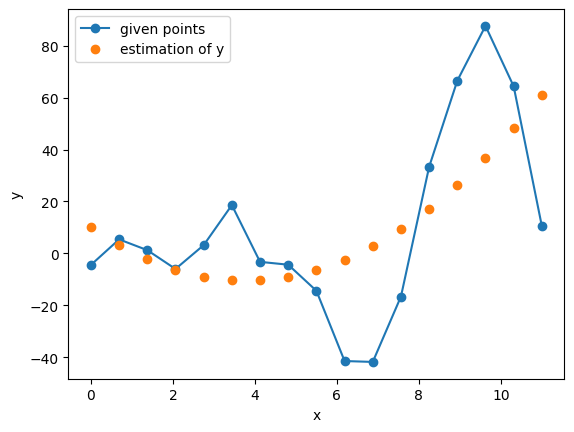

In [4]:
n = 3
lambda_reg = 0.0
X = np.vander(x, n + 1, increasing=True)
w = estimate_w(X, y, lambda_reg)
plt.plot(x, y, 'o-', label="given points")
plt.plot(x, X @ w, 'o', label="estimation of y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

#### 3. (8 points) 

(1) Implement a grid search by changing the polynomial degree $n$ as well as the regularization parameter $\lambda$

(2) find the best mse (mean squared error) that you can reach. Print your best search mse.

In [5]:
n_ = [i for i in range(7, 12)]
lambda_ = [0.0, 0.01, 0.1, 0.5, 1.0]
ans = {}
for n in n_:
	X = np.vander(x, n + 1, increasing=True)
	for lambda_reg in lambda_:
		w = estimate_w(X, y, lambda_reg)
		ans[(n, lambda_reg)] = ((X @ w - y) ** 2).mean()
print(f"Best MSE: {min(ans.values())}")
f_n, f_lambda = min(ans, key=ans.get)

Best MSE: 21.17863235052307


#### 4. (1 point) 

(1) Display in 3D the results of your grid search.

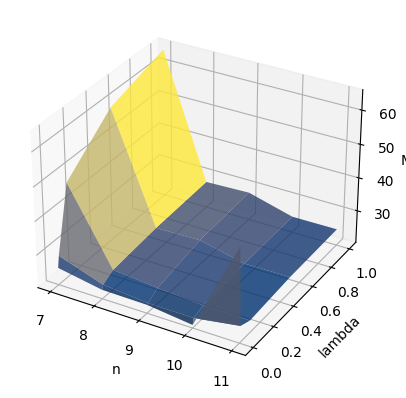

In [6]:
img = plt.axes(projection='3d')
img.grid(True)
img.set_xlabel("n")
img.set_ylabel("lambda")
img.set_zlabel("MSE")
X, Y = np.meshgrid(n_, lambda_)
Z = np.array([ans[(i, j)] for j in lambda_ for i in n_]).reshape(X.shape)
img.plot_surface(X, Y, Z, cmap=plt.cm.cividis, edgecolor="none", alpha=0.8)
plt.show()

#### 5. (1 point) 

(1) Define the function $f$ that you found.


In [7]:
w = estimate_w(np.vander(x, f_n + 1, increasing=True), y, f_lambda)
def f(x):
	return np.vander(x, f_n + 1, increasing=True) @ w

#### 5. (6 points) 

(1) Load the 1000 points taken from the ground truth fuction $g$. You will find data on the range $x\in[-5,20]$.

(2) Display for $x\in [0,11]$:
 - Display $g$ in color 'C0' with the points that you loaded.
 - Scatter the given 17 samples in color 'C1'. 
 - Display (enough densely) your $f$ in color 'C2'.
 - Display the legend indicating the 3 plots. Specify the name for axis x and y.

(3) Repeat (2) for $x\in [-1,12]$

(4) Repeat (2) for $x\in [-2,13]$

(5) Give some comments on this work.

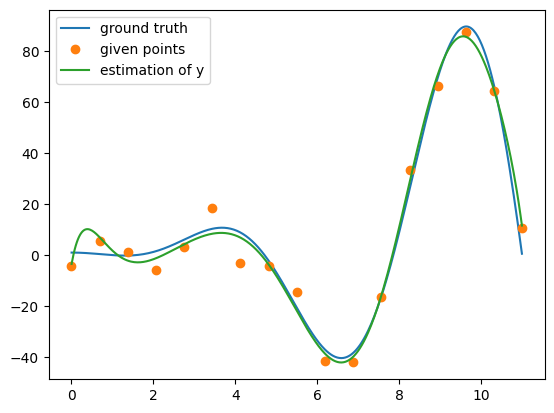

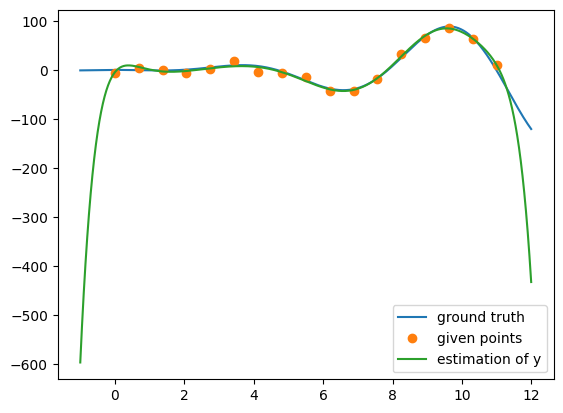

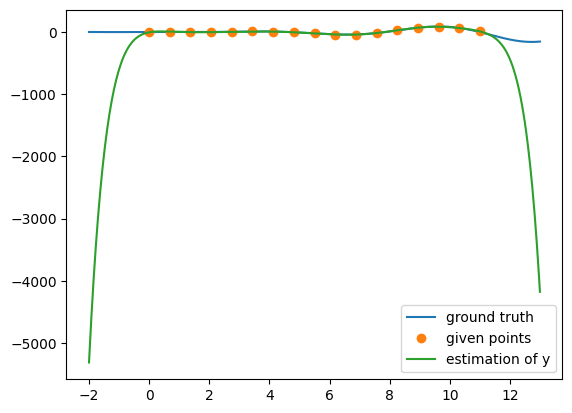

In [8]:
# load
import pickle as pkl
with open('ground truth function', 'rb') as fil:
	x_real_g, y_real_g = pkl.load(fil)
	fil.close()
for l, r in zip((0, -1, -2), (11, 12, 13)):
	x_real, y_real = x_real_g[np.where((x_real_g >= l) & (x_real_g <= r))], y_real_g[np.where((x_real_g >= l) & (x_real_g <= r))]
	plt.plot(x_real, y_real, label="ground truth", color="C0")
	plt.plot(x, y, 'o', label="given points", color="C1")
	plt.plot(x_real, f(x_real).reshape(-1), label="estimation of y", color="C2")
	plt.legend()
	plt.show()

comments:

About the Problem:
* Maybe the name of the function and the filestream should be differ next time. Do NOT always use `f`!!!

About my work:
* It fits the function well in the given interval $[0, 11]$.
* However, it performs unexpectedly bad outside this range due to lack of training data.
* It shows that in machine learning, algorithms may not perform as expected when data is limited.
* And when it hits the best MSE, the regulation $\lambda$ is $0$, thus the model is likely to overfit.
* To get better performance on general cases, we should manually increase $\lambda$.